In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import nltk
from nltk.corpus import stopwords
from nltk.stem.snowball import SnowballStemmer
from string import punctuation
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score, KFold

In [2]:
swords = stopwords.words('russian')

In [3]:
stem = SnowballStemmer('russian')

In [4]:
df = pd.read_csv('./wb_school_task_2.csv.gzip', compression='gzip')

In [17]:
df

,id1,id2,id3,text,f1,f2,f3,f4,f5,f6,f7,f8,label
0,7596126584852021591,173777575861152844,18254136755182295358,"Хотела купить на замену старых,по итогу эти у...",1,1,1.000000,11,13,4.272727,18,36,0
1,5327406586753254371,14366783259208998381,2324030737335224220,Запах по сравнению с обычным DOVE никакой. Оно...,10,6,2.700000,46,4,4.434783,90,109,1
2,2636757786779776109,16985421652518589249,4904562693381133981,"Кабель подошёл, хорошо работает.",4,4,4.000000,14,0,4.500000,4,6,0
3,15432976385014516263,2629180387521298831,13541353053200353836,"Восторг! Очень приятный аромат, держится долго...",6,6,5.000000,374,30,4.772727,14,15,1
4,11933982800034911890,14531191561111600318,9121890650636487522,Визуально все хорошо. Не пробовали. Купили в п...,19,18,5.000000,6,4,5.000000,26,33,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3118,764513678578182418,15635360211325277203,6836784353719029392,"Стекло не плохое,но есть один минус на техно с...",2,2,3.000000,19,1,4.263158,9,9,0
3119,6838893897482150395,13016265854619171030,12090430373311552618,"Всё пришло запаковано, ничего не сломано. Лучш...",8,8,4.375000,131,83,4.183206,18,18,0
3120,3080528623596565085,17787644417937804433,18003133089489520237,"Мне нравятся 👍🏻 я очень аллергичная, посоветов...",13,12,5.000000,145,2,4.944828,12,14,0
3121,13059704988549832630,997055248102065549,12214993272083833542,"Спасибо, целая пришла. Хорошо упаковано",3,3,5.000000,205,19,4.648780,103,155,0


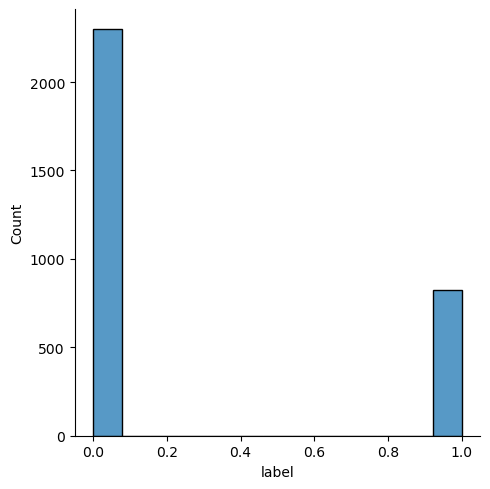

In [23]:
sns.displot(df, x='label')

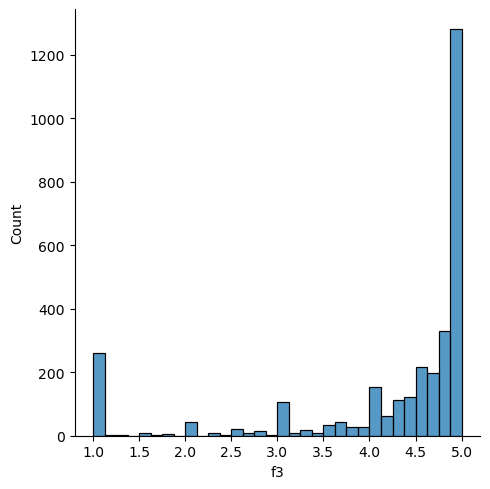

In [26]:
sns.displot(df, x='f3')

In [73]:
df[df.duplicated(subset = ['id2'])].index

Int64Index([  46,   73,  368,  413,  564,  596,  612,  629,  630,  631,
            ...
            2992, 2993, 3000, 3022, 3046, 3049, 3054, 3083, 3085, 3101],
           dtype='int64', length=117)

In [202]:
df.loc[df['id2'] == df.id2[3085]].head()

,id1,id2,id3,text,f1,f2,f3,f4,f5,f6,f7,f8,label
756,1076575605779048698,3345344880097563888,14918306419713499452,"Заказала 02 оттенок, фотографии приложу) Значи...",8,8,4.750000,20419,4690,4.67878,74,108,0
757,13687420362999564220,3345344880097563888,14918306419713499452,консилер хороший советую!,6,6,3.333333,20419,4690,4.67878,6,6,0
1723,13823627268069149155,3345344880097563888,14918306419713499452,цвет не подошёл,1,1,4.000000,20419,4690,4.67878,12,17,0
3085,17564680862523094259,3345344880097563888,14918306419713499452,огонь!!!!!,7,7,4.857143,20419,4690,4.67878,24,24,0


In [33]:
df[df.duplicated(subset = ['id3'])].index

Int64Index([  26,   43,   46,   47,   48,   49,   50,   54,   62,   68,
            ...
            3110, 3111, 3112, 3113, 3116, 3117, 3118, 3119, 3120, 3121],
           dtype='int64', length=2145)

In [31]:
df.loc[df['id3'] == df.id3[26]].head()

,id1,id2,id3,text,f1,f2,f3,f4,f5,f6,f7,f8,label


In [34]:
df[df.duplicated(subset = ['id1'])].index

Int64Index([  46,   70,   75,   79,  145,  160,  184,  199,  221,  230,  233,
             239,  251,  268,  269,  278,  283,  327,  343,  349,  402,  433,
             438,  448,  542,  818,  927,  985, 1062, 1157, 1514, 1529, 1533,
            1534, 1572, 1739, 1744, 1781, 1822, 1836, 1939, 1940, 1964, 2007,
            2085, 2150, 2185, 2244, 2245, 2247, 2347, 2399, 2450, 2489, 2540,
            2554, 2556, 2557, 2561, 2611, 2614, 2633, 2652, 2732, 2746, 2755,
            2770, 2790, 2831, 2837, 2854, 3014, 3020, 3090],
           dtype='int64')

In [38]:
df.loc[df['id1'] == df.id1[75]]

,id1,id2,id3,text,f1,f2,f3,f4,f5,f6,f7,f8,label
41,5002269436549863957,8537018422111626685,2452047199270097551,"Сзади шнуровка , внутри мех и внешне выглядит ...",40,2,5.0,4,6,4.500000,13,43,1
75,5002269436549863957,13669343433924914553,2452047199270097551,"Мне подошли размер в размер. Бежевые ,смотрятс...",40,2,5.0,6,9,3.666667,13,43,1
79,5002269436549863957,11253309069675330304,2452047199270097551,Мне подошли размер в размер. Легко надела . Уд...,40,2,5.0,8,9,4.250000,13,43,1
145,5002269436549863957,12540256564528009708,2452047199270097551,Хороши на холодную слякотную погоду. Смотрятся...,40,2,5.0,4,5,4.250000,13,43,0
233,5002269436549863957,4707051732118680101,2452047199270097551,Вот такие классные ботиночки из натуральной за...,40,2,5.0,8,6,4.875000,13,43,1
327,5002269436549863957,17163190472521893796,7715615707067664181,Понравились- качество достойное! Мне подошли н...,40,2,5.0,8,6,4.500000,13,43,1
438,5002269436549863957,7184918404601862719,11037372112584364428,"Размер в размер плотно сели, но натуральная ко...",40,2,5.0,5,6,4.800000,13,43,0
542,5002269436549863957,2918697925375352353,2452047199270097551,"Меня привлекло ,то как сделана подошва, можно ...",40,2,5.0,19,17,4.368421,13,43,0
818,5002269436549863957,7793738754320529137,815378434367114826,Сумка сыну понравилась! Качество хорошее. Брак...,40,2,5.0,2,2,5.000000,13,43,1
1062,5002269436549863957,8779533373574352561,2452047199270097551,"Хорошие ботинки,удобные,смотрятся брутально. Н...",40,2,5.0,16,14,4.875000,13,43,1


In [35]:
text = df.text

In [7]:
text[0]

'Хотела купить на замену старых,по итогу эти  ужаснотупые ,не удобные ,рвут кутикулу ,а не режут.'

# Первичная обработка

In [8]:
tokenized_sw_p = pd.Series([nltk.word_tokenize(text[i], language='russian') for i in range(0, len(text))])

In [9]:
tokenized_sw_p.head()

0    [Хотела, купить, на, замену, старых, ,, по, ит...
1    [Запах, по, сравнению, с, обычным, DOVE, никак...
2            [Кабель, подошёл, ,, хорошо, работает, .]
3    [Восторг, !, Очень, приятный, аромат, ,, держи...
4    [Визуально, все, хорошо, ., Не, пробовали, ., ...
dtype: object

In [10]:
stemmed = []
for i in range(0, len(tokenized_sw_p)):
    stemmed.append([stem.stem(token) for token in tokenized_sw_p[i] if token not in swords and token not in punctuation])
stemmed = pd.Series(stemmed)

In [11]:
del tokenized_sw_p
del text

In [12]:
stemmed.head()

0    [хотел, куп, замен, стар, итог, ужаснотуп, удо...
1    [зап, сравнен, обычн, DOVE, никак, он, парфюми...
2                             [кабел, подошел, работа]
3    [восторг, очен, приятн, аромат, держ, долг, оч...
4                [визуальн, не, пробова, куп, подарок]
dtype: object

In [13]:
for i in range(0, len(stemmed)):
    stemmed[i] = " ".join(stemmed[i])
stemmed.head()

0    хотел куп замен стар итог ужаснотуп удобн рвут...
1    зап сравнен обычн DOVE никак он парфюмирова то...
2                                 кабел подошел работа
3    восторг очен приятн аромат держ долг очен удоб...
4                      визуальн не пробова куп подарок
dtype: object

In [14]:
DTC = DecisionTreeClassifier()

In [15]:
vec = TfidfVectorizer()

In [16]:
X = vec.fit_transform(stemmed)
y = df.label

In [17]:
crval = cross_val_score(DTC, X, y, cv = KFold(n_splits=5), scoring='precision')

In [18]:
crval

array([0.35820896, 0.31736527, 0.31451613, 0.31060606, 0.28455285])